## Import modules

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from fbprophet import Prophet

In [60]:
!pip install pystan==2.19 
!pip install fbprophet
# install visual c++ - visual studio
# if you face errors - use conda install

## Loading the dataset

In [61]:
df = pd.read_csv('Traffic data.csv')
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [62]:
df

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


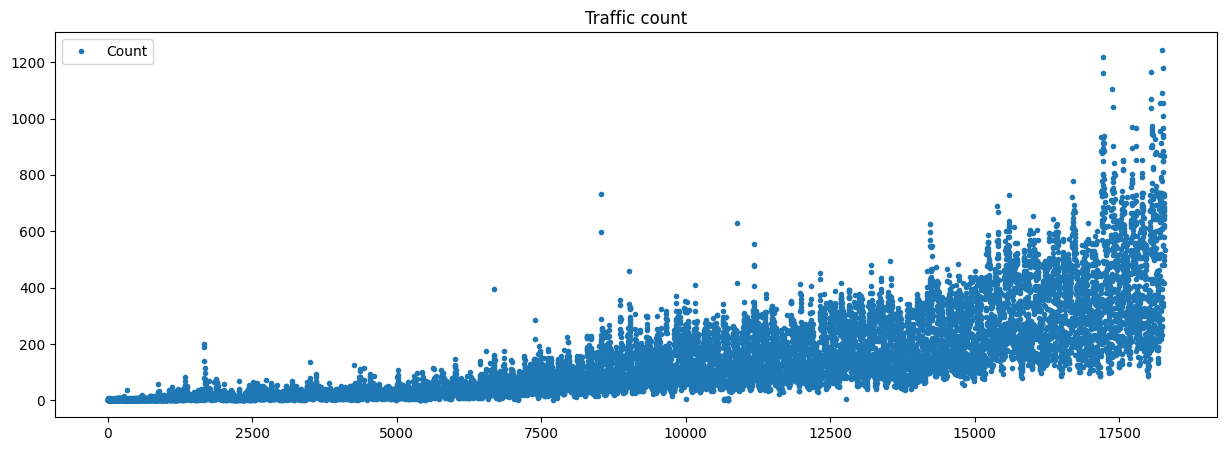

In [63]:
df.drop(df.columns[[0]], axis=1, inplace=False).plot(style='.', figsize=(15,5), title='Traffic count')
plt.show()

## Preprocessing the dataset

In [64]:
# check null values
df.isnull().sum()

ID          0
Datetime    0
Count       0
dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [66]:
# convert object to datetime datatype
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y %H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ID        18288 non-null  int64         
 1   Datetime  18288 non-null  datetime64[ns]
 2   Count     18288 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 428.8 KB


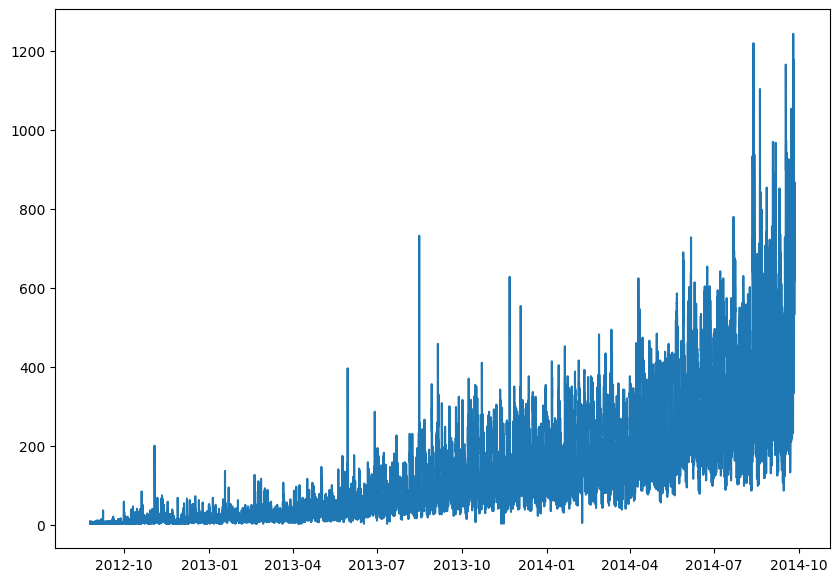

In [67]:
# EDA
plt.figure(figsize=(10,7))
plt.plot(df['Datetime'], df['Count'])
plt.show()

<Figure size 1000x700 with 0 Axes>

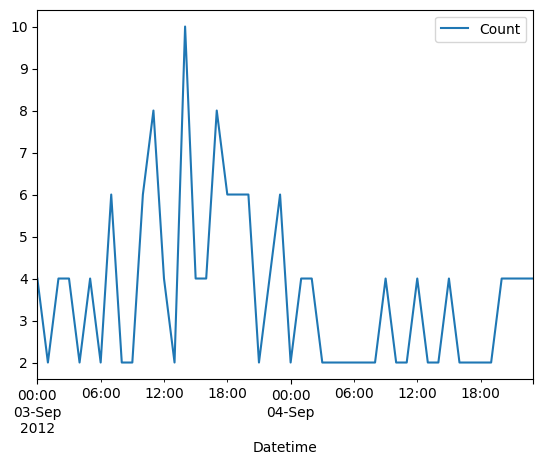

In [68]:
# EDA
plt.figure(figsize=(10,7))
df.iloc[216:264].plot(x='Datetime', y='Count')
plt.show()

## Format data for the model

In [69]:
df.index = df['Datetime']
df['y'] = df['Count']
df.drop(columns=['ID', 'Datetime', 'Count'], axis=1, inplace=True)
#df = df.resample('D').sum()
df.head()

,y
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


In [70]:
df['ds'] = df.index
df.head()

,y,ds
Datetime,,
2012-08-25 00:00:00,8,2012-08-25 00:00:00
2012-08-25 01:00:00,2,2012-08-25 01:00:00
2012-08-25 02:00:00,6,2012-08-25 02:00:00
2012-08-25 03:00:00,2,2012-08-25 03:00:00
2012-08-25 04:00:00,2,2012-08-25 04:00:00


## Input Split

In [71]:
!pip install scikit-learn

In [72]:
#import scikit-learn as sklearn
size = 2400
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=size/len(df), shuffle=False)

In [73]:
train.tail()

,y,ds
Datetime,,
2014-06-17 19:00:00,458,2014-06-17 19:00:00
2014-06-17 20:00:00,422,2014-06-17 20:00:00
2014-06-17 21:00:00,432,2014-06-17 21:00:00
2014-06-17 22:00:00,408,2014-06-17 22:00:00
2014-06-17 23:00:00,438,2014-06-17 23:00:00


In [74]:
test.head()

,y,ds
Datetime,,
2014-06-18 00:00:00,394,2014-06-18 00:00:00
2014-06-18 01:00:00,274,2014-06-18 01:00:00
2014-06-18 02:00:00,230,2014-06-18 02:00:00
2014-06-18 03:00:00,204,2014-06-18 03:00:00
2014-06-18 04:00:00,220,2014-06-18 04:00:00


In [75]:
test.tail()

,y,ds
Datetime,,
2014-09-25 19:00:00,868,2014-09-25 19:00:00
2014-09-25 20:00:00,732,2014-09-25 20:00:00
2014-09-25 21:00:00,702,2014-09-25 21:00:00
2014-09-25 22:00:00,580,2014-09-25 22:00:00
2014-09-25 23:00:00,534,2014-09-25 23:00:00


## Model Training

In [76]:
model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.9)
model.fit(train)

Initial log joint probability = -311.397


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99         34926     0.0132859        550.81           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       34933.6   0.000488418       133.602      0.1746           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       34935.5    0.00158651       133.994      0.3903           1      391   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       34936.7     0.0037395       364.983      0.3605           1      514   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     490       34937.4   3.80417e-05       144.002   5.295e-07       0.001      659  LS failed, Hessian reset 
     499       34937.4   4.56961e-05       52.1783      0.6346      0.6346      6

In [77]:
future = model.make_future_dataframe(periods=2400 ,freq='h')
future

,ds
0,2012-08-25 00:00:00
1,2012-08-25 01:00:00
2,2012-08-25 02:00:00
3,2012-08-25 03:00:00
4,2012-08-25 04:00:00
...,...
18283,2014-09-25 19:00:00
18284,2014-09-25 20:00:00
18285,2014-09-25 21:00:00
18286,2014-09-25 22:00:00


In [78]:
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25 00:00:00,-30.173607,-57.653510,71.390193,-30.173607,-30.173607,33.835487,33.835487,33.835487,6.236570,...,-5.484491,-5.484491,-5.484491,33.083409,33.083409,33.083409,0.0,0.0,0.0,3.661881
1,2012-08-25 01:00:00,-30.156110,-74.857615,47.233146,-30.156110,-30.156110,16.158426,16.158426,16.158426,-9.806522,...,-7.107145,-7.107145,-7.107145,33.072094,33.072094,33.072094,0.0,0.0,0.0,-13.997684
2,2012-08-25 02:00:00,-30.138614,-90.682620,32.131046,-30.138614,-30.138614,-1.846996,-1.846996,-1.846996,-26.097013,...,-8.810675,-8.810675,-8.810675,33.060692,33.060692,33.060692,0.0,0.0,0.0,-31.985610
3,2012-08-25 03:00:00,-30.121117,-112.149465,18.894192,-30.121117,-30.121117,-16.961210,-16.961210,-16.961210,-39.420089,...,-10.590326,-10.590326,-10.590326,33.049205,33.049205,33.049205,0.0,0.0,0.0,-47.082327
4,2012-08-25 04:00:00,-30.103621,-120.102243,5.359390,-30.103621,-30.103621,-28.074702,-28.074702,-28.074702,-48.672074,...,-12.440260,-12.440260,-12.440260,33.037633,33.037633,33.037633,0.0,0.0,0.0,-58.178322


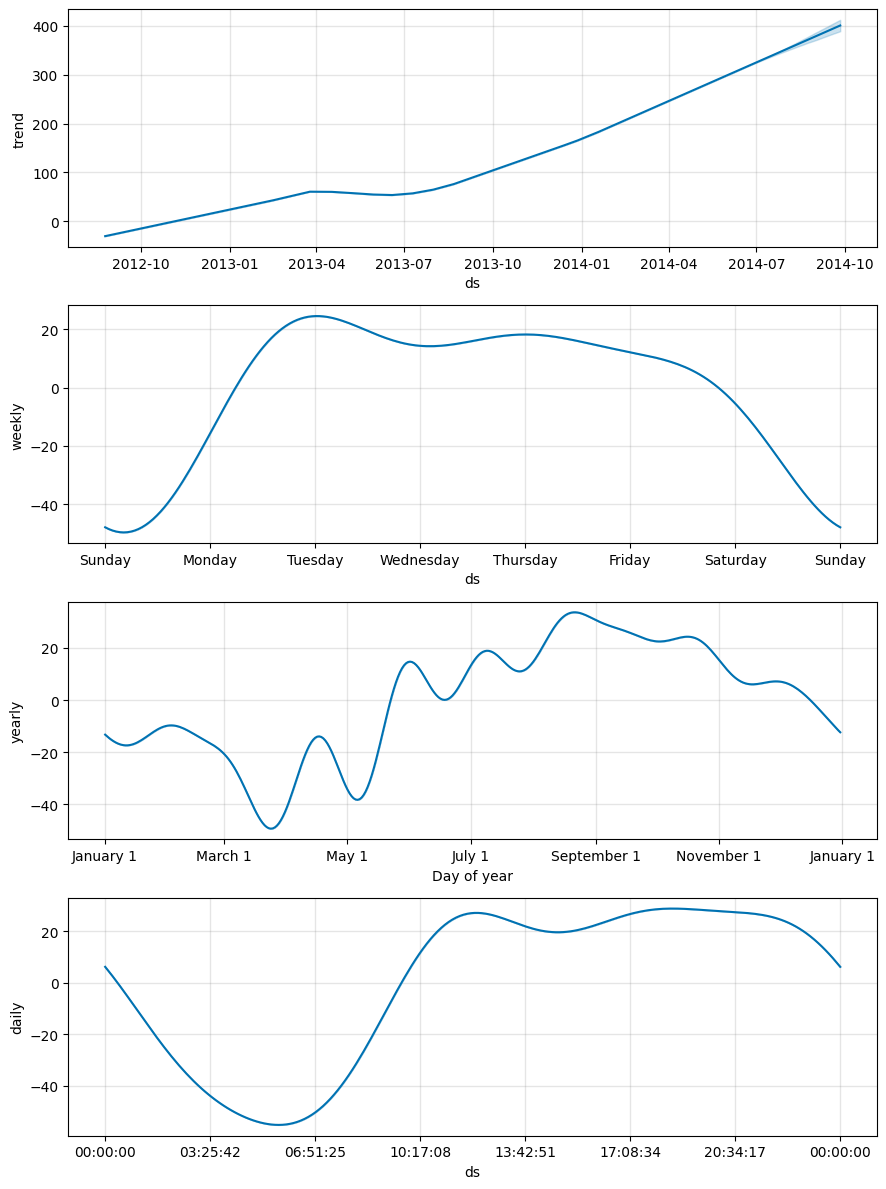

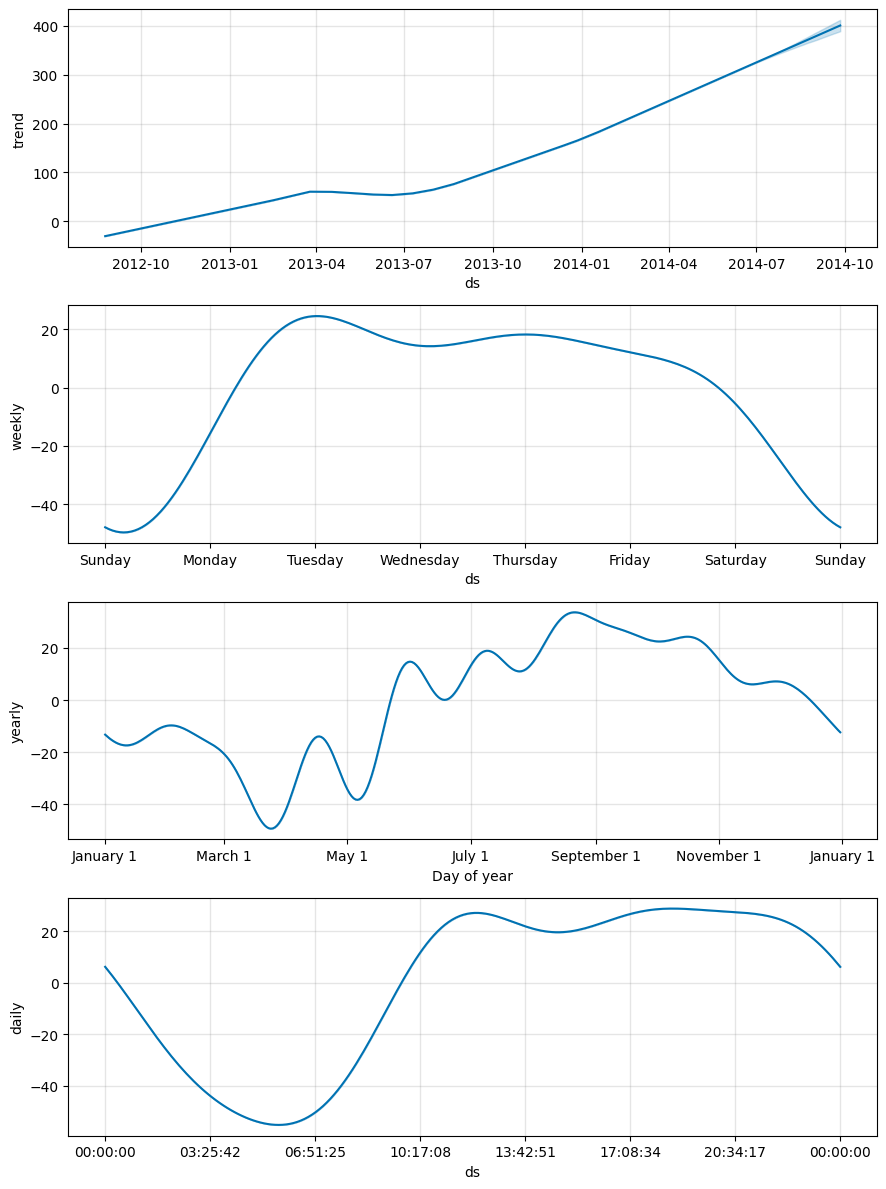

In [79]:
model.plot_components(forecast)

In [80]:
pred = forecast.iloc[-2400:, :]
len(pred)

2400

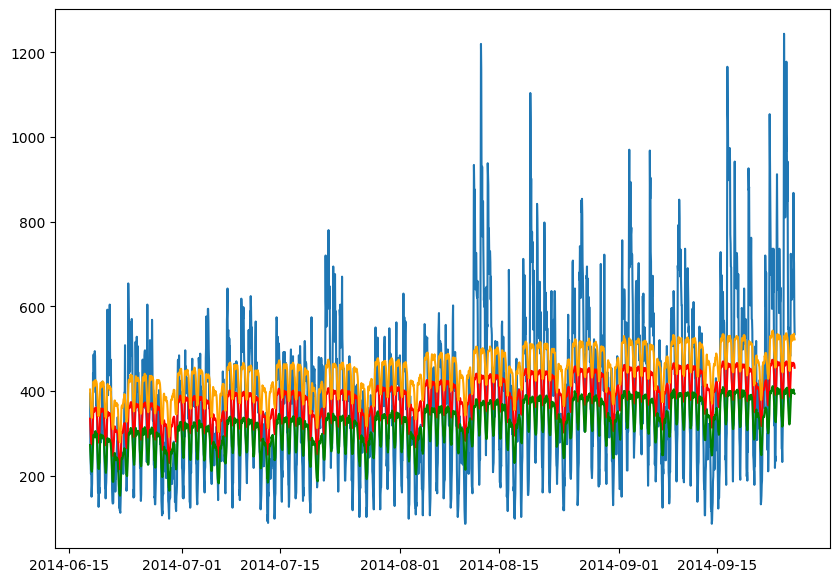

In [81]:
# test results
plt.figure(figsize=(10,7))
plt.plot(test['ds'], test['y'])
plt.plot(pred['ds'], pred['yhat'], color='red')
plt.plot(pred['ds'], pred['yhat_lower'], color='green')
plt.plot(pred['ds'], pred['yhat_upper'], color='orange')
plt.show()

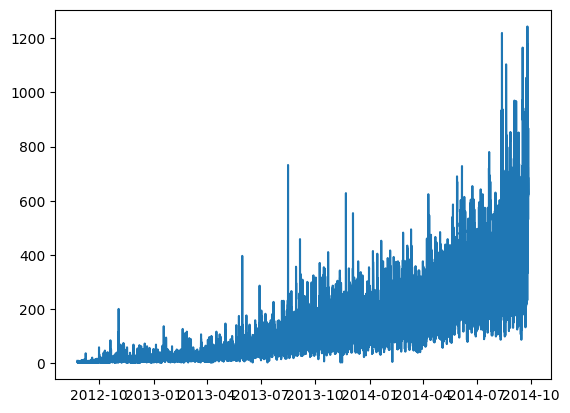

In [82]:
# input data
plt.plot(df['ds'], df['y'])
plt.show()

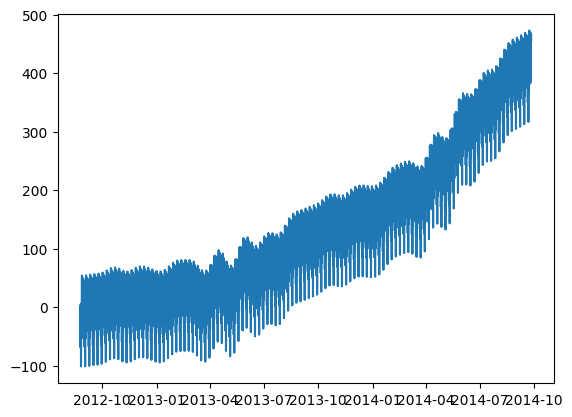

In [83]:
# forecast data
plt.plot(forecast['ds'], forecast['yhat'])
plt.show()

In [84]:
model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.9)
model.fit(df)
future = model.make_future_dataframe(periods=1000, freq='h')
forecast = model.predict(future)
forecast.head()

Initial log joint probability = -165.451
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       43822.6    0.00871396       1594.37           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       43840.3    0.00332981       216.053           1           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299         43845    0.00161978       377.115           1           1      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       43846.5   8.41974e-05       170.251      0.1329      0.5909      476   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       43847.2    0.00345359       690.378      0.1653           1      593   
    Iter      log prob        ||dx||      ||grad||       alpha  

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25 00:00:00,15.273519,-83.672568,91.873713,15.273519,15.273519,-9.603411,-9.603411,-9.603411,5.315729,...,-6.796933,-6.796933,-6.796933,-8.122208,-8.122208,-8.122208,0.0,0.0,0.0,5.670108
1,2012-08-25 01:00:00,15.264491,-113.547274,69.683851,15.264491,15.264491,-34.115019,-34.115019,-34.115019,-17.130117,...,-8.839952,-8.839952,-8.839952,-8.144950,-8.144950,-8.144950,0.0,0.0,0.0,-18.850528
2,2012-08-25 02:00:00,15.255463,-130.327883,49.480704,15.255463,15.255463,-58.891235,-58.891235,-58.891235,-39.722617,...,-11.000624,-11.000624,-11.000624,-8.167993,-8.167993,-8.167993,0.0,0.0,0.0,-43.635772
3,2012-08-25 03:00:00,15.246436,-149.835696,20.681085,15.246436,15.246436,-78.713944,-78.713944,-78.713944,-57.251143,...,-13.271466,-13.271466,-13.271466,-8.191336,-8.191336,-8.191336,0.0,0.0,0.0,-63.467509
4,2012-08-25 04:00:00,15.237408,-166.409895,5.222189,15.237408,15.237408,-92.212141,-92.212141,-92.212141,-68.353684,...,-15.643482,-15.643482,-15.643482,-8.214975,-8.214975,-8.214975,0.0,0.0,0.0,-76.974733


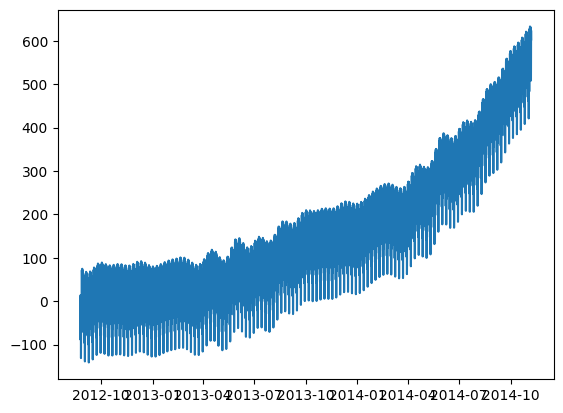

In [85]:
# forecast data
plt.plot(forecast['ds'], forecast['yhat'])
plt.show()

In [86]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25 00:00:00,15.273519,-83.672568,91.873713,15.273519,15.273519,-9.603411,-9.603411,-9.603411,5.315729,...,-6.796933,-6.796933,-6.796933,-8.122208,-8.122208,-8.122208,0.0,0.0,0.0,5.670108
1,2012-08-25 01:00:00,15.264491,-113.547274,69.683851,15.264491,15.264491,-34.115019,-34.115019,-34.115019,-17.130117,...,-8.839952,-8.839952,-8.839952,-8.144950,-8.144950,-8.144950,0.0,0.0,0.0,-18.850528
2,2012-08-25 02:00:00,15.255463,-130.327883,49.480704,15.255463,15.255463,-58.891235,-58.891235,-58.891235,-39.722617,...,-11.000624,-11.000624,-11.000624,-8.167993,-8.167993,-8.167993,0.0,0.0,0.0,-43.635772
3,2012-08-25 03:00:00,15.246436,-149.835696,20.681085,15.246436,15.246436,-78.713944,-78.713944,-78.713944,-57.251143,...,-13.271466,-13.271466,-13.271466,-8.191336,-8.191336,-8.191336,0.0,0.0,0.0,-63.467509
4,2012-08-25 04:00:00,15.237408,-166.409895,5.222189,15.237408,15.237408,-92.212141,-92.212141,-92.212141,-68.353684,...,-15.643482,-15.643482,-15.643482,-8.214975,-8.214975,-8.214975,0.0,0.0,0.0,-76.974733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19283,2014-11-06 11:00:00,555.135417,534.789731,701.129020,550.011343,560.892906,63.607750,63.607750,63.607750,38.285298,...,15.601693,15.601693,15.601693,9.720759,9.720759,9.720759,0.0,0.0,0.0,618.743167
19284,2014-11-06 12:00:00,555.203338,535.012186,711.879135,550.066349,560.970815,68.635278,68.635278,68.635278,43.892175,...,15.033144,15.033144,15.033144,9.709959,9.709959,9.709959,0.0,0.0,0.0,623.838616
19285,2014-11-06 13:00:00,555.271260,524.934382,701.197512,550.121354,561.048723,61.177687,61.177687,61.177687,36.989395,...,14.489222,14.489222,14.489222,9.699070,9.699070,9.699070,0.0,0.0,0.0,616.448946
19286,2014-11-06 14:00:00,555.339181,524.646733,695.500352,550.176360,561.126631,51.349051,51.349051,51.349051,27.686953,...,13.974004,13.974004,13.974004,9.688094,9.688094,9.688094,0.0,0.0,0.0,606.688232


## New

In [87]:
df

,y,ds
Datetime,,
2012-08-25 00:00:00,8,2012-08-25 00:00:00
2012-08-25 01:00:00,2,2012-08-25 01:00:00
2012-08-25 02:00:00,6,2012-08-25 02:00:00
2012-08-25 03:00:00,2,2012-08-25 03:00:00
2012-08-25 04:00:00,2,2012-08-25 04:00:00
...,...,...
2014-09-25 19:00:00,868,2014-09-25 19:00:00
2014-09-25 20:00:00,732,2014-09-25 20:00:00
2014-09-25 21:00:00,702,2014-09-25 21:00:00


In [88]:
split_date = '18-Aug-2014'
df_train = df.loc[df.index <= split_date].copy()
df_test = df.loc[df.index > split_date].copy()

In [89]:
df_train.tail()

,y,ds
Datetime,,
2014-08-17 20:00:00,378,2014-08-17 20:00:00
2014-08-17 21:00:00,374,2014-08-17 21:00:00
2014-08-17 22:00:00,342,2014-08-17 22:00:00
2014-08-17 23:00:00,304,2014-08-17 23:00:00
2014-08-18 00:00:00,314,2014-08-18 00:00:00


In [90]:
df_test.head()

,y,ds
Datetime,,
2014-08-18 01:00:00,230,2014-08-18 01:00:00
2014-08-18 02:00:00,200,2014-08-18 02:00:00
2014-08-18 03:00:00,134,2014-08-18 03:00:00
2014-08-18 04:00:00,102,2014-08-18 04:00:00
2014-08-18 05:00:00,128,2014-08-18 05:00:00


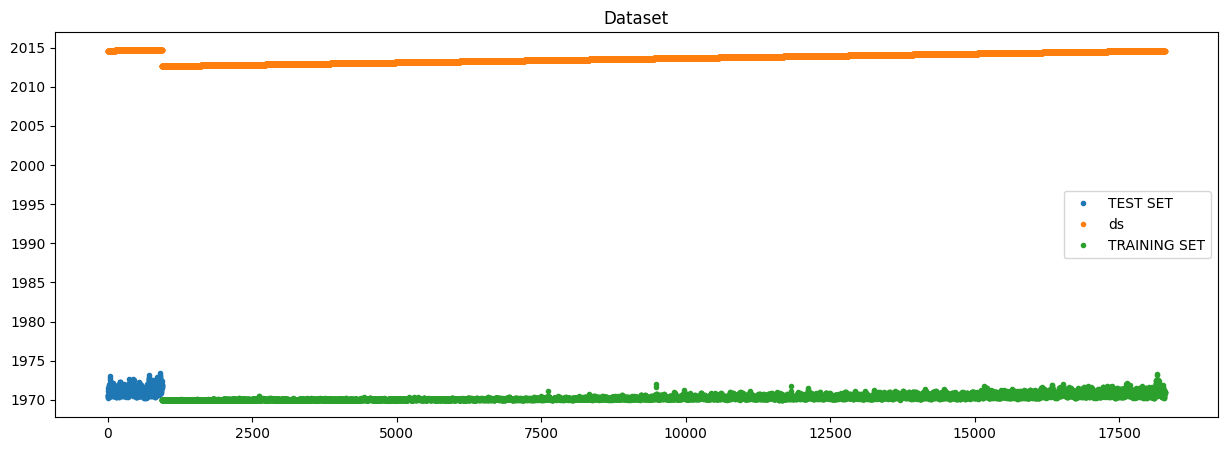

In [95]:
# Plot train and test so you can see where we have split
df_test \
    .rename(columns={'y': 'TEST SET'}) \
    .merge(df_train.rename(columns={'y': 'TRAINING SET'}),
          how='outer') \
    .plot(figsize=(15,5), title='Dataset', style='.')

plt.show()

In [96]:
model = Prophet()
model.fit(df_train.reset_index())

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -49.6046


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       43862.9    0.00100767       1106.86      0.2426     0.02426      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       43882.1     0.0101491       239.605           1           1      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299         43887   5.20505e-05       130.149           1           1      367   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     329       43887.6   9.03392e-06       107.977   6.434e-08       0.001      448  LS failed, Hessian reset 
     399       43889.1   0.000185294       403.893      0.3492           1      533   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       43891.2    0.00012712       100.689      0.6544      0.6544      6

In [97]:
df_test_fcst = model.predict(df=df_test.reset_index())

In [98]:
df_test_fcst.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-08-18 01:00:00,385.961734,292.970620,433.988431,385.961734,385.961734,-26.452754,-26.452754,-26.452754,-13.533669,-13.533669,-13.533669,-12.919085,-12.919085,-12.919085,0.0,0.0,0.0,359.508980
1,2014-08-18 02:00:00,386.014206,264.028738,418.938768,386.014206,386.014206,-42.765024,-42.765024,-42.765024,-33.033504,-33.033504,-33.033504,-9.731521,-9.731521,-9.731521,0.0,0.0,0.0,343.249181
2,2014-08-18 03:00:00,386.066678,251.197543,402.569487,386.066678,386.066678,-55.218570,-55.218570,-55.218570,-48.635557,-48.635557,-48.635557,-6.583013,-6.583013,-6.583013,0.0,0.0,0.0,330.848108
3,2014-08-18 04:00:00,386.119150,243.095817,399.980281,386.119150,386.119150,-62.536197,-62.536197,-62.536197,-59.044035,-59.044035,-59.044035,-3.492161,-3.492161,-3.492161,0.0,0.0,0.0,323.582953
4,2014-08-18 05:00:00,386.171622,243.593064,398.238636,386.171622,386.171622,-65.278669,-65.278669,-65.278669,-64.801909,-64.801909,-64.801909,-0.476760,-0.476760,-0.476760,0.0,0.0,0.0,320.892953


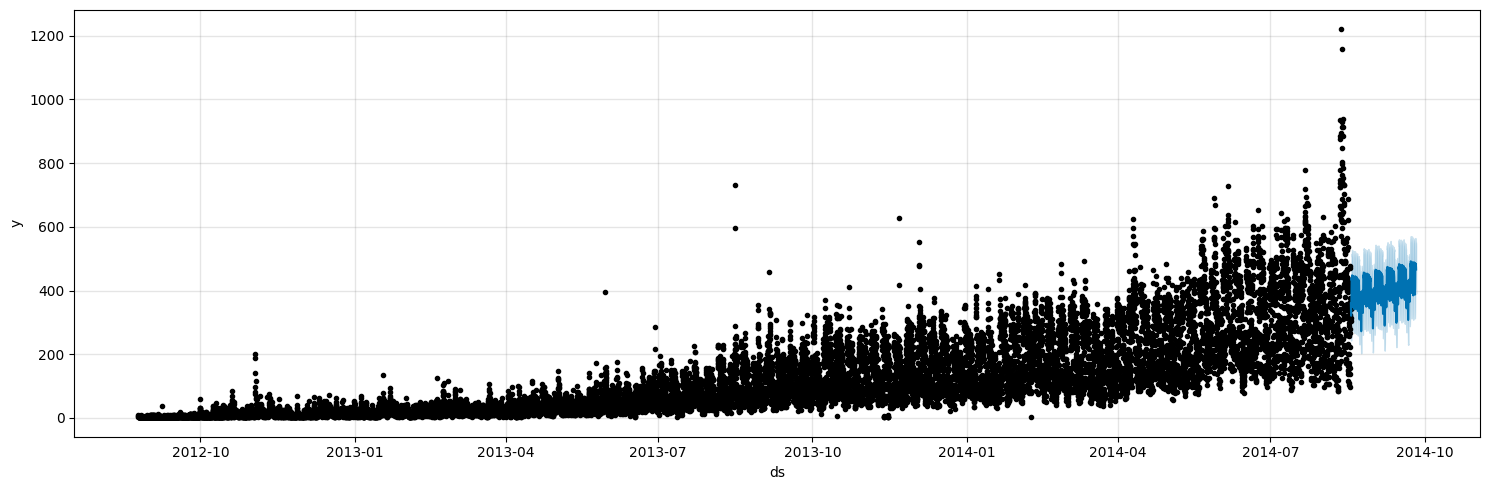

In [99]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(df_test_fcst,ax=ax)
plt.show()

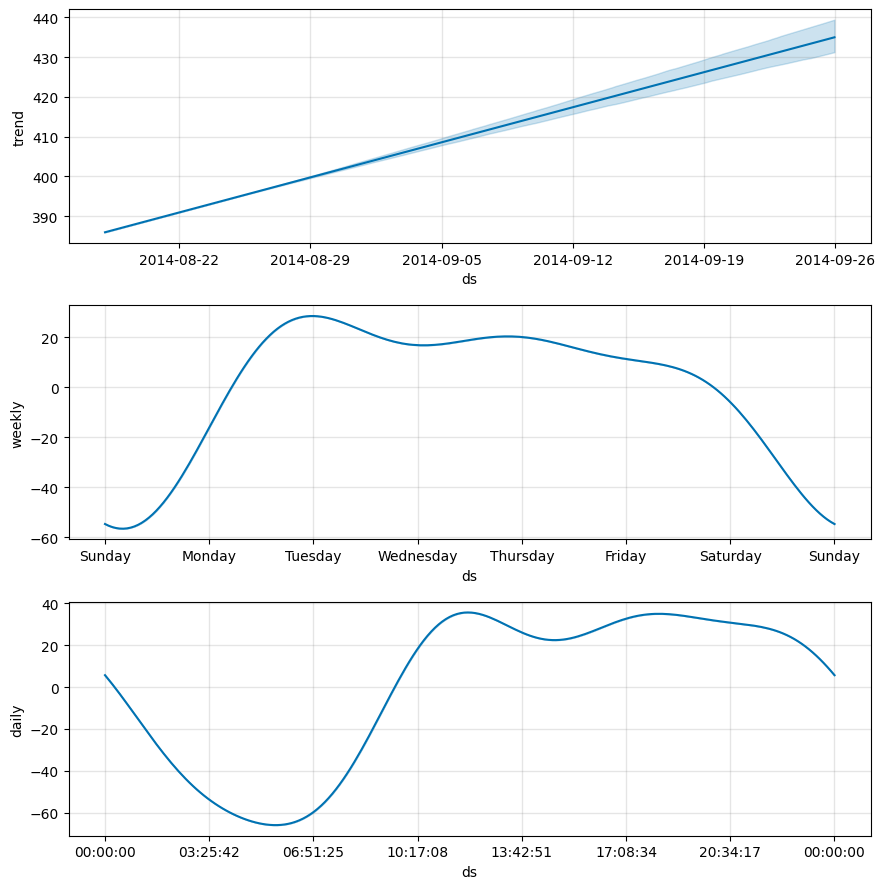

In [100]:
fig = model.plot_components(df_test_fcst)

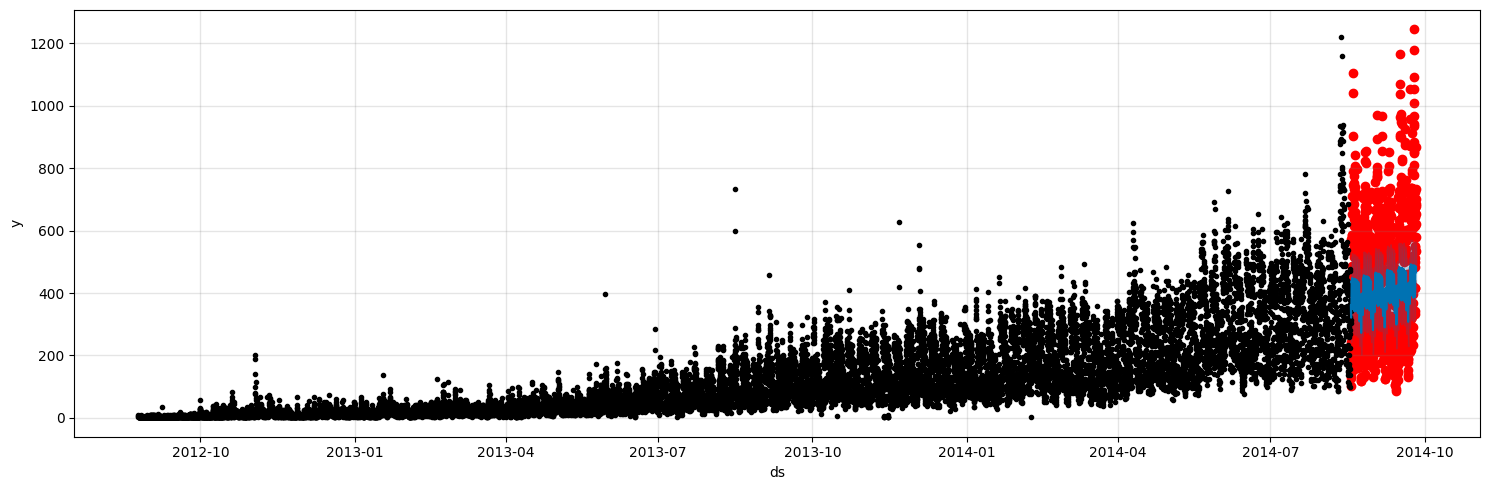

In [101]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(df_test.index, df_test['y'], color='r')
fig = model.plot(df_test_fcst, ax=ax)

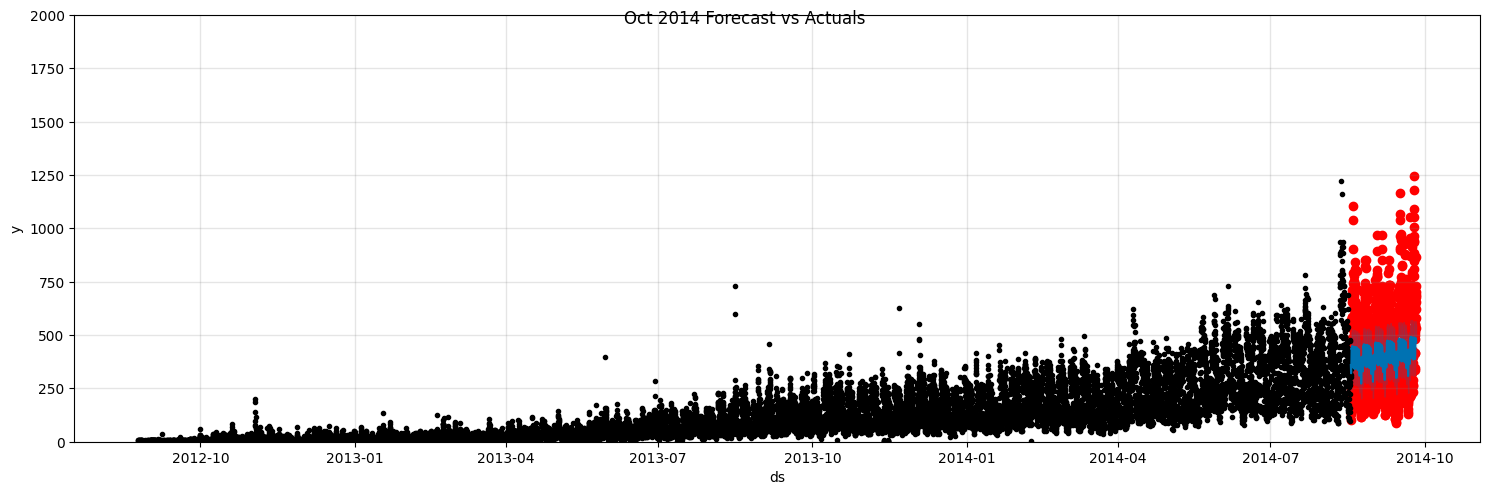

In [102]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(df_test.index, df_test['y'], color='r')
fig = model.plot(df_test_fcst, ax=ax)
#ax.set_xbound(lower='2014-08-26',upper='2014-09-26')
ax.set_ylim(0, 2000)
plot = plt.suptitle('Oct 2014 Forecast vs Actuals')

## Error Metrics

In [103]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [104]:
mean_squared_error(y_true=df_test['y'],y_pred=df_test_fcst['yhat'])

31316.6672197612

In [105]:
mean_absolute_error(y_true=df_test['y'],y_pred=df_test_fcst['yhat'])

138.9936401737244

In [106]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) *10

mean_absolute_percentage_error(y_true=df_test['y'],y_pred=df_test_fcst['yhat'])

3.662853148113787

In [107]:
future = model.make_future_dataframe(periods=24000 ,freq='h')
future

,ds
0,2012-08-25 00:00:00
1,2012-08-25 01:00:00
2,2012-08-25 02:00:00
3,2012-08-25 03:00:00
4,2012-08-25 04:00:00
...,...
41348,2017-05-13 20:00:00
41349,2017-05-13 21:00:00
41350,2017-05-13 22:00:00
41351,2017-05-13 23:00:00


In [108]:
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25 00:00:00,4.736960,-70.493361,83.151016,4.736960,4.736960,-0.283016,-0.283016,-0.283016,5.673894,5.673894,5.673894,-5.956910,-5.956910,-5.956910,0.0,0.0,0.0,4.453945
1,2012-08-25 01:00:00,4.741311,-90.319911,63.397762,4.741311,4.741311,-21.299823,-21.299823,-21.299823,-13.533669,-13.533669,-13.533669,-7.766154,-7.766154,-7.766154,0.0,0.0,0.0,-16.558511
2,2012-08-25 02:00:00,4.745662,-113.120637,41.964513,4.745662,4.745662,-42.711788,-42.711788,-42.711788,-33.033504,-33.033504,-33.033504,-9.678285,-9.678285,-9.678285,0.0,0.0,0.0,-37.966126
3,2012-08-25 03:00:00,4.750013,-134.351499,23.445711,4.750013,4.750013,-60.323122,-60.323122,-60.323122,-48.635557,-48.635557,-48.635557,-11.687565,-11.687565,-11.687565,0.0,0.0,0.0,-55.573109
4,2012-08-25 04:00:00,4.754364,-143.064597,5.580420,4.754364,4.754364,-72.830928,-72.830928,-72.830928,-59.044035,-59.044035,-59.044035,-13.786893,-13.786893,-13.786893,0.0,0.0,0.0,-68.076564


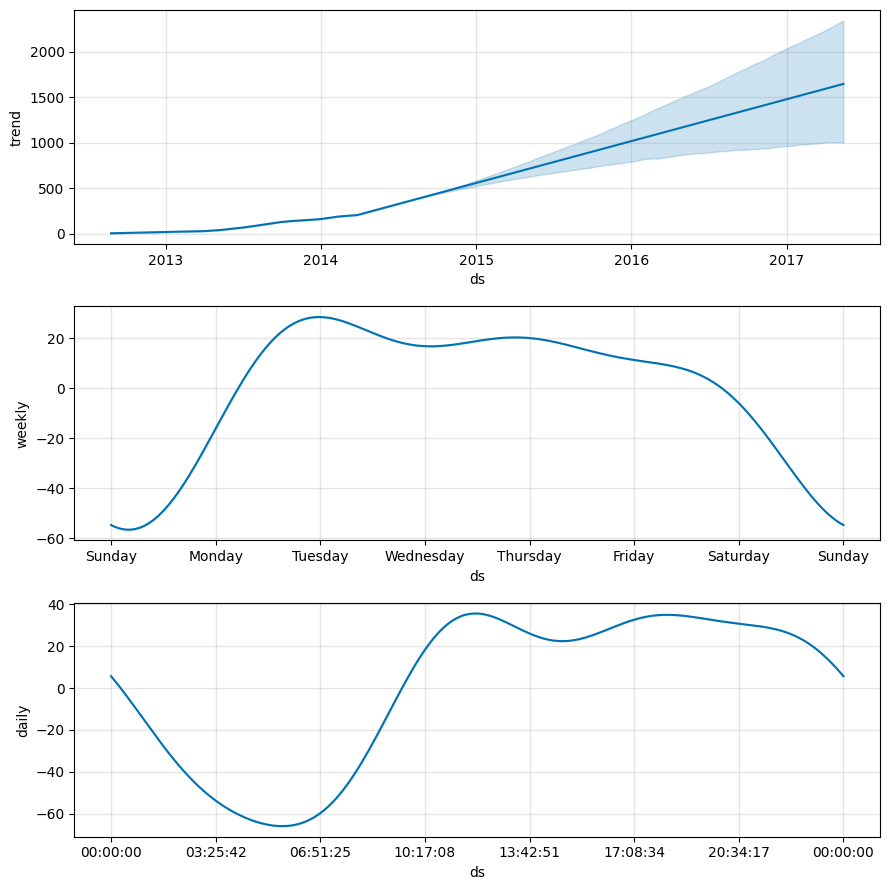

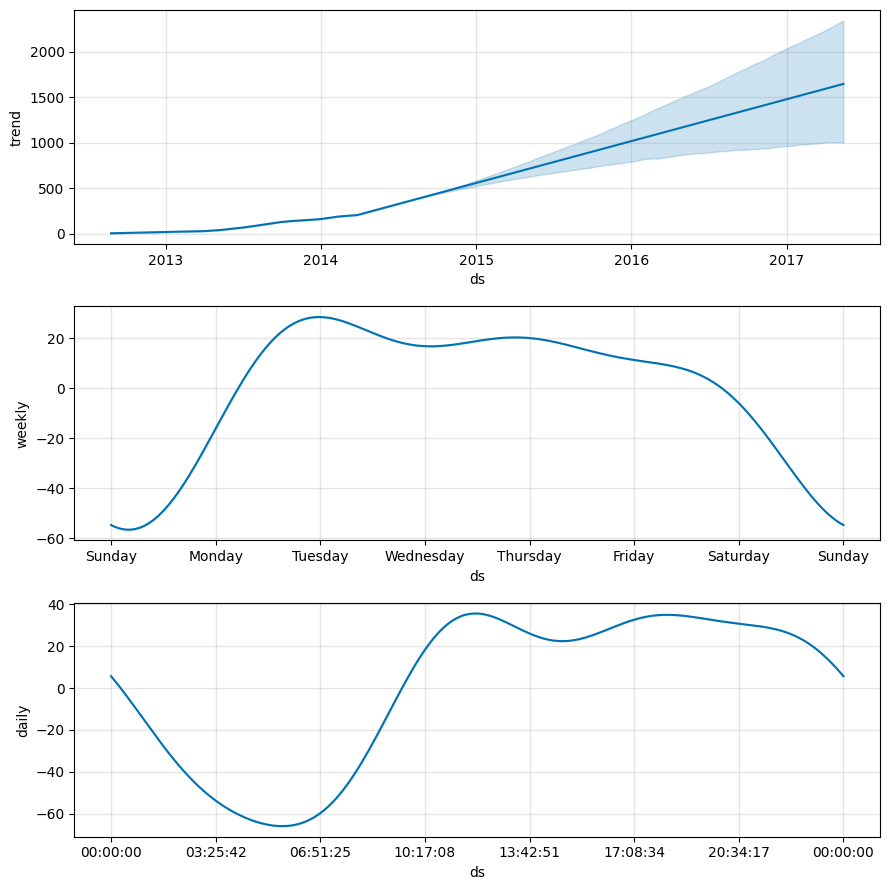

In [109]:
model.plot_components(forecast)

In [110]:
pred = forecast.iloc[-24000:, :]
len(pred)

24000

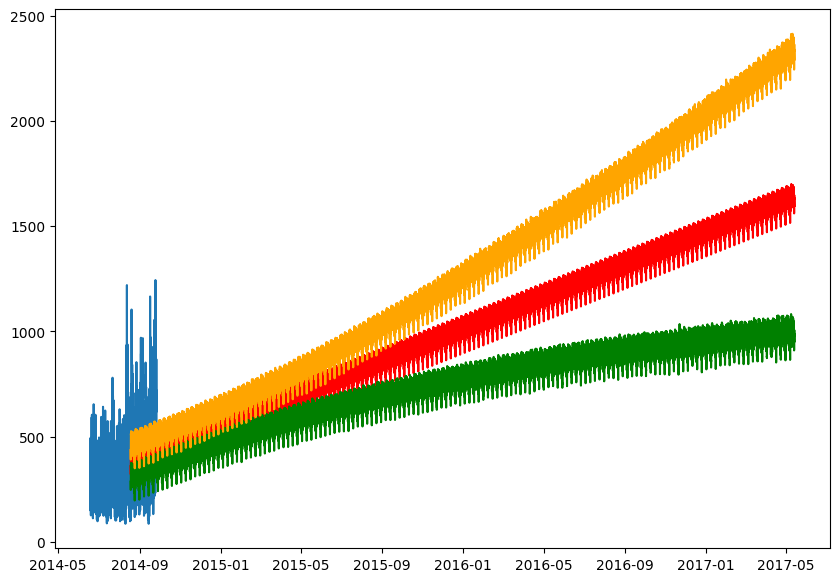

In [111]:
# test results
plt.figure(figsize=(10,7))
plt.plot(test['ds'], test['y'])
plt.plot(pred['ds'], pred['yhat'], color='red')
plt.plot(pred['ds'], pred['yhat_lower'], color='green')
plt.plot(pred['ds'], pred['yhat_upper'], color='orange')
plt.show()

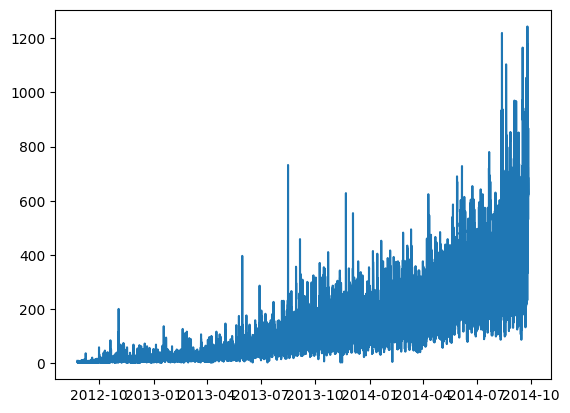

In [112]:
# input data
plt.plot(df['ds'], df['y'])
plt.show()

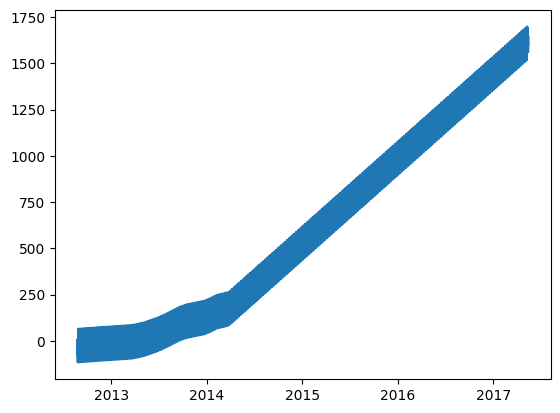

In [113]:
# forecast data
plt.plot(forecast['ds'], forecast['yhat'])
plt.show()

## forecast

In [115]:
def predictCount(date):
    if date>'2017-05-14':
        return "Not predicted yet"
    else:
        var = forecast.loc[forecast['ds']==date,'yhat'].values[0]
        return var.round()
    
predictCount('2016-11-03 00:00:00')

1429.0